Meme Kanseri Teşhisi İçin Gözetimli Öğrenme: Scikit-learn ile Lojistik Regresyon

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


In [2]:
# Veri setini yükle
data = load_breast_cancer()

# Özellikler ve hedef değişkeni al
X = data.data
y = data.target

# Veri seti hakkında bilgi
print(data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
# %80 eğitim, %20 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Lojistik Regresyon Modeli
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

# Test verisi ile tahmin yap
y_pred = model.predict(X_test_scaled)


In [6]:
# Doğruluk (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Sınıflandırma Raporu
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", report)


Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [7]:
# 6. Başarı metrikleri
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Skoru: ", accuracy)


Accuracy Skoru:  0.9736842105263158


In [8]:
# 7. Confusion matrix ve classification raporu
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [10]:
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



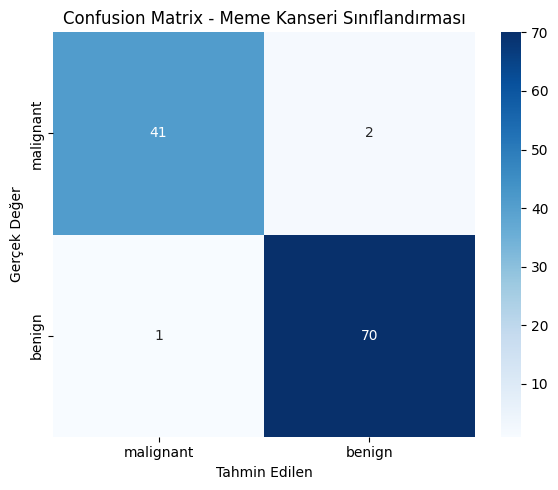

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 8. Confusion matrix görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Confusion Matrix - Meme Kanseri Sınıflandırması")
plt.tight_layout()
plt.show()